In [399]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100

plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams["figure.figsize"] = 8, 5



In [400]:
data=pd.read_csv('input/train.csv')

Делим данные на train и valid

In [401]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [402]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9069,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,B,B,6,1437,3,NaN,0,2,B,88504.384965
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663
7738,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,B,B,43,7227,0,NaN,1,6,A,182126.280899
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
5058,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,B,B,16,4048,3,NaN,1,3,B,322048.433990


Видим, что есть пропуски в данных. С LifeSquare поработаем, а HealthCare_1 не будем брать в расчет

In [403]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 20 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       5514 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null object
Ecology_3        7000 non-null object
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Healthcare_1     3642 non-null float64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Shops_2          7000 non-null object
Price            7000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.1+ MB


In [404]:
MeanSQByNRooms=train.groupby(['Rooms'])[['Square']].mean()
MeanSQByNRooms

,Square
Rooms,
0.0,62.714154
1.0,41.366349
2.0,56.808238
3.0,77.128820
4.0,98.651884
5.0,103.645574
6.0,59.414334
10.0,59.056975
19.0,42.006046


Видим, что площадь квартир растет при росте комнат от 1 до 5, а на иных значениях количества конат присутствуют явные ошибки в данных:

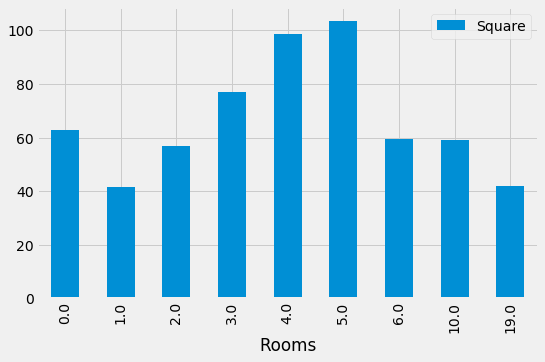

In [405]:
MeanSQByNRooms.plot(kind='bar')

Нахождение адекватных границ Sqгare и LifeSquare для определения их соотношения

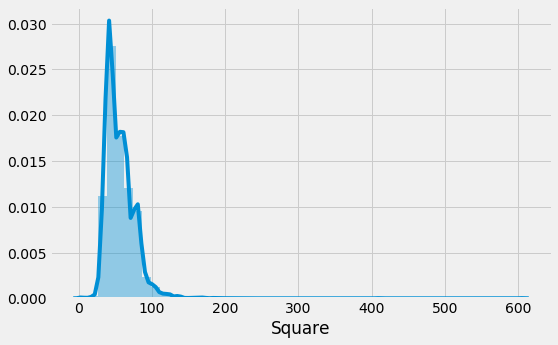

In [406]:
sns.distplot(train['Square'])

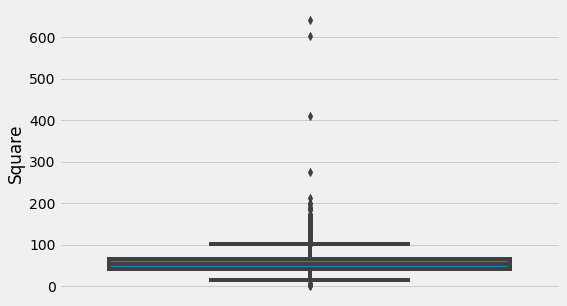

In [407]:
sns.boxplot(data['Square'], orient='v')

In [408]:
data['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [409]:
IQR=65.900625-41.774881
1.5*IQR

36.18861600000001

In [410]:
Square_min=41.774881-1.5*IQR
Square_min

5.58626499999999

In [411]:
Square_max=250


In [412]:
Bad_Square=train.loc[(train['Square']<Square_min) | (train['Square']>Square_max ) , ['Square','LifeSquare', 'Rooms', 'Price']]
Bad_Square

,Square,LifeSquare,Rooms,Price
4262,604.705972,NaN,2.0,187717.242538
3413,5.129222,5.549458,1.0,369472.403061
3280,4.380726,40.805837,1.0,97560.720383
8030,4.823679,79.767964,3.0,237716.681261
4690,409.425181,410.639749,1.0,90470.430830
9613,4.502784,4.618547,1.0,483283.488083
1316,4.633498,1.969969,1.0,107604.269441
4853,2.377248,0.873147,0.0,126596.941798
9294,2.954309,5.257278,1.0,438005.182323


In [413]:
Good_Square=train.loc[(train['Square']>=Square_min) & (train['Square']<=Square_max ) , ['Square','LifeSquare', 'Rooms', 'Price']]
Good_Square=Good_Square.loc[(Good_Square['LifeSquare']>=Square_min) | (Good_Square['LifeSquare']<=Square_max)]

#Good_Square=train.loc[(train['Square']>=Square_min),['Square']]
Good_Square.describe()                            


,Square,LifeSquare,Rooms,Price
count,5506.000000,5506.000000,5506.000000,5506.000000
mean,55.238177,37.478006,1.922811,224144.328183
std,18.723317,102.015362,0.863446,95303.623934
min,13.784865,0.370619,0.000000,59174.778028
25%,41.099155,22.801890,1.000000,162414.119464
50%,51.193832,32.870761,2.000000,200292.375592
75%,64.740245,45.121115,3.000000,262004.086014
max,200.334539,7480.592129,19.000000,625678.644994


In [414]:
Good_Square_and_Rooms=Good_Square=Good_Square.loc[(Good_Square['Rooms']>0) & (Good_Square['Rooms']<=5)]

In [415]:
LifeSq_ratio=Good_Square_and_Rooms['LifeSquare'].sum()/Good_Square_and_Rooms['Square'].sum()
LifeSq_ratio

0.6783810121584248

In [416]:
Sq_room_ratio=Good_Square_and_Rooms['Square'].sum()/Good_Square_and_Rooms['Rooms'].sum()
Sq_room_ratio

28.79477821286967

----------------------Чистим экстремальные значения комнат, исходя из средней площади квартиры---------------------

In [417]:

def clean_rooms(df, Sq_room_ratio):
    df.loc[(df['Rooms']==0) | (df['Rooms']>5),['Rooms']]=np.ceil(df['Square']/Sq_room_ratio)
    

In [418]:
clean_rooms(train, Sq_room_ratio=Sq_room_ratio)
clean_rooms(valid, Sq_room_ratio=Sq_room_ratio)

In [419]:
train['Rooms'].value_counts()

2.0    2728
1.0    2595
3.0    1561
4.0     103
5.0      13
Name: Rooms, dtype: int64

In [420]:
valid['Rooms'].value_counts()

2.0    1156
1.0    1111
3.0     678
4.0      48
5.0       6
8.0       1
Name: Rooms, dtype: int64

-----------------Изменяем "плохие" значения общей площади-------------

In [421]:
Bad_Square

,Square,LifeSquare,Rooms,Price
4262,604.705972,NaN,2.0,187717.242538
3413,5.129222,5.549458,1.0,369472.403061
3280,4.380726,40.805837,1.0,97560.720383
8030,4.823679,79.767964,3.0,237716.681261
4690,409.425181,410.639749,1.0,90470.430830
9613,4.502784,4.618547,1.0,483283.488083
1316,4.633498,1.969969,1.0,107604.269441
4853,2.377248,0.873147,0.0,126596.941798
9294,2.954309,5.257278,1.0,438005.182323


In [422]:
def clean_Square(df,Square_min, Square_max, LifeSq_ratio, Sq_room_ratio):
    # выбираем плохие Square c хорошими LifeSqure и пересчитываем, исходя из LifeSqure
    Bad_SQ=df.loc[((df['Square']<Square_min) | (df['Square']>Square_max)) & ((df['LifeSquare']>= Square_min)& (df['LifeSquare']<= Square_max)), ['Square']]=df['LifeSquare']/LifeSq_ratio
    # для остальных берем среднюю площадь комнаты
    Bad_SQ=df.loc[(df['Square']<Square_min) | (df['Square']>Square_max),['Square']]=df['Rooms']*Sq_room_ratio

In [423]:
clean_Square(train,Square_min=Square_min, Square_max=Square_max, LifeSq_ratio=LifeSq_ratio, Sq_room_ratio=Sq_room_ratio)
clean_Square(valid,Square_min=Square_min, Square_max=Square_max, LifeSq_ratio=LifeSq_ratio, Sq_room_ratio=Sq_room_ratio)

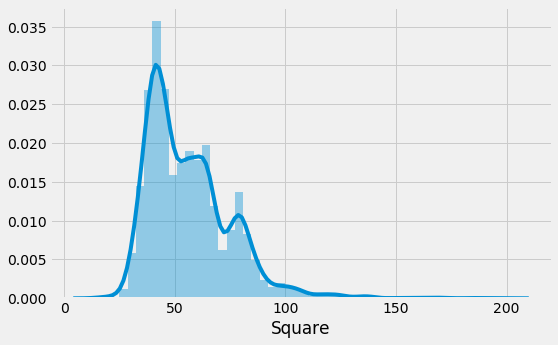

In [424]:
sns.distplot(train['Square'])

Text(0.5, 1.0, 'Зависимость жилой площади от общей площади до чистки')

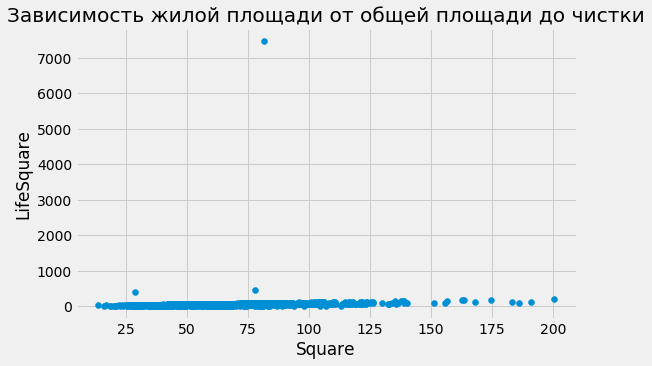

In [425]:
plt.scatter(train['Square'],train['LifeSquare'])
plt.xlabel('Square')
plt.ylabel('LifeSquare')
plt.title('Зависимость жилой площади от общей площади до чистки')

In [426]:
data['LifeSquare'].describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

In [427]:
IQR2=45.128803-22.769832
IQR2

22.358970999999997

------------------Заполняем 'плохие' значения LifeSquare----------------------

In [428]:
def fill_LifeSquare(df, LifeSq_ratio):
    df.loc[(df['LifeSquare'].isnull()) | (df['LifeSquare']<6) | (df['LifeSquare']>df['Square']),'LifeSquare'] =df['Square']*LifeSq_ratio

In [429]:
fill_LifeSquare(train, LifeSq_ratio=LifeSq_ratio)
fill_LifeSquare(valid, LifeSq_ratio=LifeSq_ratio)

Text(0.5, 1.0, 'Зависимость жилой площади от общей площади после чистки')

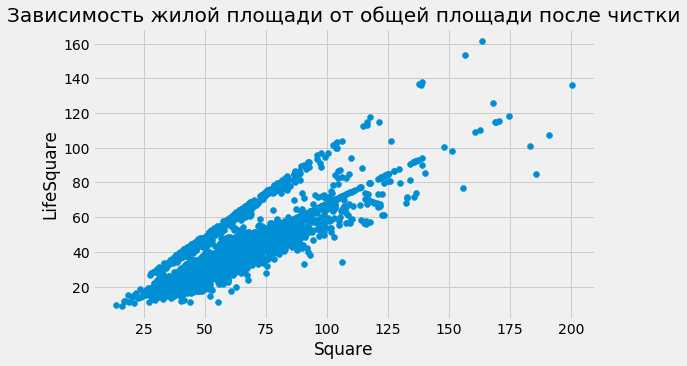

In [430]:
plt.scatter(train['Square'],train['LifeSquare'])
plt.xlabel('Square')
plt.ylabel('LifeSquare')
plt.title('Зависимость жилой площади от общей площади после чистки')

In [431]:
train[['LifeSquare','Square','Rooms','Price']].describe()


,LifeSquare,Square,Rooms,Price
count,7000.000000,7000.000000,7000.000000,7000.000000
mean,36.746723,56.216794,1.887286,214449.167390
std,14.888046,18.926845,0.810355,92924.798790
min,8.822988,13.784865,1.000000,59174.778028
25%,25.731472,41.745094,1.000000,154599.240157
50%,33.532000,52.648143,2.000000,192290.039215
75%,45.016265,65.980391,2.000000,249080.956886
max,161.504222,200.334539,5.000000,627525.072788


-----------------------Почистим площадь кухни-----------------

In [432]:
train['KitchenSquare'].mean()

6.490714285714286

In [433]:
train['KitchenSquare'].describe()

count    7000.000000
mean        6.490714
std        33.999713
min         0.000000
25%         1.000000
50%         6.000000
75%         9.000000
max      2014.000000
Name: KitchenSquare, dtype: float64

In [434]:
def cleanKitchenSquare(df):
    df.loc[(df['KitchenSquare']>20) | (df['KitchenSquare']==0),'KitchenSquare']=6

In [435]:
cleanKitchenSquare(train)
cleanKitchenSquare(valid)

In [436]:
train['KitchenSquare'].describe()

count    7000.000000
mean        6.117714
std         3.574429
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        20.000000
Name: KitchenSquare, dtype: float64

----------дополнительно проанализируем комнаты и их площадь---------------------

In [437]:
train.groupby(['Rooms'])[['Square','Price']].mean()

,Square,Price
Rooms,,
1.0,41.274067,160121.886867
2.0,56.594066,215195.121983
3.0,77.180927,290795.184593
4.0,98.651884,385776.526291
5.0,106.321121,377639.783211


In [438]:
train.groupby(['Rooms'])[['Square']].max()

,Square
Rooms,
1.0,174.649522
2.0,170.379494
3.0,190.857689
4.0,200.334539
5.0,183.382273


видим, что все равно остались комнаты с экстремальной площадью

In [439]:
train.loc[(train['Rooms']==1) & (train['Square']>70), ['Rooms','Square','Price']]

,Rooms,Square,Price
6094,1.0,103.744170,223249.331500
3260,1.0,160.647588,217874.997452
2881,1.0,148.179026,160902.854650
4525,1.0,105.619549,476843.942405
9589,1.0,106.260300,509162.416594
506,1.0,105.432181,218718.046451
1956,1.0,106.239622,274139.065875
5452,1.0,102.640234,342223.033781
7885,1.0,109.144492,289034.391871
8274,1.0,106.514211,242956.031432


Цена на однокомнатные квартиры с большой площадью достаточно высокая и соответствует площади. Вероятно, проблема в количестве комнат

In [440]:
train.loc[(train['Rooms']==1) & (train['Square']>70), ['Rooms','Square','LifeSquare','Price']].mean()

Rooms              1.000000
Square           108.478990
LifeSquare        77.245333
Price         314045.526645
dtype: float64

In [441]:
train.loc[(train['Rooms']>1) & (train['Square']/train['Rooms']<10), ['Rooms','Square','LifeSquare','Price']]

,Rooms,Square,LifeSquare,Price
6945,2.0,17.414181,11.813450,180750.471749
4739,3.0,13.784865,9.351391,78388.806186
3271,5.0,42.003293,28.494237,112693.641769
4431,5.0,39.906082,39.394024,206148.845716


Здесь тоже явно остались проблемы с количеством комнат, т.к. цена маленькая

In [442]:
def add_clean_rooms(df):
    df.loc[(df['Square']/df['Rooms']<70) & (df['Square']/df['Rooms']<15), ['Rooms']]=np.ceil(df['Square']/Sq_room_ratio)

In [443]:
add_clean_rooms(train)
add_clean_rooms(valid)

--------------------- чистим HouseYear -------------------------------------------------

In [444]:
print(train['HouseYear'].value_counts().sort_index())

1912          1
1914          1
1916          1
1917          2
1918          4
1919          3
1929          1
1931          3
1932          2
1933          4
1934          2
1935          4
1936          3
1937          3
1938          4
1939          5
1940          2
1941          2
1942          2
1947          1
1948          2
1950          5
1951          2
1952          9
1953          5
1954          7
1955         13
1956         12
1957         24
1958         27
           ... 
1993         36
1994         43
1995         51
1996         63
1997         41
1998         51
1999         53
2000         54
2001         43
2002         53
2003         64
2004         68
2005         70
2006         55
2007         54
2008         66
2009         67
2010         63
2011         61
2012         57
2013         69
2014        146
2015        208
2016        207
2017        217
2018        120
2019         55
2020         15
4968          1
20052011      1
Name: HouseYear, Length:

In [445]:
mean_year=int(train.loc[(train['HouseYear']>=1900) & (train['HouseYear']<=2020),'HouseYear'].mean())
mean_year

1984

In [446]:
def clean_HouseYear(df, mean_year):
        df.loc[(df['HouseYear']<1900) | (df['HouseYear']>2020),'HouseYear']=mean_year


In [447]:
clean_HouseYear(train, mean_year)


In [448]:
clean_HouseYear(valid, mean_year)

------------------------- чистим этажи -------------------------------

In [449]:
train['Floor'].value_counts().sort_index()

1     158
2     398
3     589
4     679
5     614
6     592
7     544
8     445
9     445
10    382
11    320
12    300
13    262
14    253
15    209
16    191
17    172
18    133
19     87
20     47
21     41
22     37
23     15
24     39
25     26
26     11
27      3
28      3
31      1
32      2
33      1
42      1
Name: Floor, dtype: int64

In [450]:
train['HouseFloor'].value_counts().sort_index()

0.0       183
1.0       357
2.0        34
3.0        87
4.0        89
5.0       707
6.0        41
7.0        32
8.0       104
9.0       975
10.0       97
11.0       21
12.0      749
13.0       14
14.0      446
15.0       95
16.0      394
17.0     1633
18.0       57
19.0       87
20.0       78
21.0       23
22.0      241
23.0       25
24.0      122
25.0      265
27.0        5
28.0        1
29.0        1
30.0       17
31.0        1
32.0        3
36.0        1
37.0        2
39.0        2
40.0        5
44.0        1
47.0        1
48.0        1
99.0        2
117.0       1
Name: HouseFloor, dtype: int64

In [451]:
mean_floor=int(train['Floor'].mean())
mean_floor

8

In [452]:
mean_house_floor=int(train['HouseFloor'].mean())
mean_house_floor

12

In [453]:
def clean_HouseFloor(df):  
        df.loc[(df['HouseFloor']<1) | (df['HouseFloor']>117),'HouseFloor']=df['Floor']
    


In [454]:
def clean_Floor(df, mean_floor):
        df.loc[((df['Floor']<1) | (df['Floor']>42) | (df['Floor']>df['HouseFloor']))&(df['HouseFloor']>mean_floor),'Floor']=mean_floor
        df.loc[((df['Floor']<1) | (df['Floor']>42) | (df['Floor']>df['HouseFloor']))&(df['HouseFloor']<=mean_floor),'Floor']=df['HouseFloor']
        


In [455]:
clean_HouseFloor(train)
clean_HouseFloor(valid)

In [456]:
clean_Floor(train, mean_floor)
clean_Floor(valid, mean_floor)

In [457]:
train.loc[:,['HouseFloor','Floor']].describe()

,HouseFloor,Floor
count,7000.000000,7000.000000
mean,12.894714,7.590571
std,6.615212,4.912094
min,1.000000,1.000000
25%,9.000000,4.000000
50%,14.000000,7.000000
75%,17.000000,10.000000
max,117.000000,42.000000


---------------Посмотрим категорийные признаки--------------------------

In [458]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [459]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9069,14604,23,1.0,41.681380,22.796166,8.0,14.0,17.0,2015,0.075779,B,B,6,1437,3,NaN,0,2,B,88504.384965
2603,5621,23,3.0,163.495333,161.504222,12.0,3.0,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663
7738,235,87,1.0,39.710131,19.538663,8.0,4.0,17.0,1986,0.100456,B,B,43,7227,0,NaN,1,6,A,182126.280899
1579,16258,48,3.0,96.056784,65.163098,1.0,1.0,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
5058,10773,77,3.0,79.195825,44.421062,10.0,16.0,17.0,1984,0.298205,B,B,16,4048,3,NaN,1,3,B,322048.433990


In [460]:
train['Ecology_2'].value_counts()

B    6936
A      64
Name: Ecology_2, dtype: int64

In [461]:
train['Ecology_3'].value_counts()

B    6798
A     202
Name: Ecology_3, dtype: int64

In [462]:
train['Helthcare_2'].value_counts()

0    2946
1    1549
3    1147
2     817
5     262
4     208
6      71
Name: Helthcare_2, dtype: int64

In [463]:
train['Shops_2'].value_counts()

B    6416
A     584
Name: Shops_2, dtype: int64

In [464]:
def clean_Ecology(df):

    df.loc[df['Ecology_3']=='A', 'Ecology_3']=0
    df.loc[df['Ecology_3']=='B', 'Ecology_3']=1
    df.loc[df['Ecology_2']=='A', 'Ecology_2']=0
    df.loc[df['Ecology_2']=='B', 'Ecology_2']=1

In [465]:
clean_Ecology(train)
clean_Ecology(valid)

In [466]:
def clean_shops(df):

    df.loc[df['Shops_2']=='A', 'Shops_2']=0
    df.loc[df['Shops_2']=='B', 'Shops_2']=1


In [467]:
clean_shops(train)
clean_shops(valid)

In [468]:
train['Ecology_3'].value_counts()

1    6798
0     202
Name: Ecology_3, dtype: int64

In [469]:
valid['Ecology_3'].value_counts()

1    2927
0      73
Name: Ecology_3, dtype: int64

-----------------------District--------------------------------------------

In [470]:
MeanPriceByDisctrict=train.groupby('DistrictId', as_index=False)[['Price','Square']].sum()
MeanPriceByDisctrict.head()

,DistrictId,Price,Square
0,0,6.662621e+06,1923.061721
1,1,8.713873e+07,27618.436080
2,2,1.440963e+07,3158.988422
3,3,9.454802e+06,2726.163466
4,4,2.232088e+06,555.617392


In [471]:
MeanPriceByDisctrict['PricePerM2']=MeanPriceByDisctrict['Price']/MeanPriceByDisctrict['Square']
MeanPriceByDisctrict=MeanPriceByDisctrict.drop(['Price','Square'],axis=1)


In [472]:
MeanPriceByDisctrict.head()

,DistrictId,PricePerM2
0,0,3464.590320
1,1,3155.092754
2,2,4561.471139
3,3,3468.171269
4,4,4017.311054


In [473]:
PricePerM2_All=(train['Price']/train['Square']).mean()
PricePerM2_All


3900.164720430913

In [474]:
train_test=pd.merge(train, MeanPriceByDisctrict, on='DistrictId', how='left')

In [475]:
train_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,PricePerM2
0,14604,23,1.0,41.681380,22.796166,8.0,14.0,17.0,2015,0.075779,1,1,6,1437,3,NaN,0,2,1,88504.384965,2225.145880
1,5621,23,3.0,163.495333,161.504222,12.0,3.0,3.0,1977,0.014073,1,1,2,475,0,NaN,0,0,1,207007.956663,2225.145880
2,235,87,1.0,39.710131,19.538663,8.0,4.0,17.0,1986,0.100456,1,1,43,7227,0,NaN,1,6,0,182126.280899,4177.354863
3,16258,48,3.0,96.056784,65.163098,1.0,1.0,1.0,2017,0.041125,1,1,46,9515,5,NaN,1,10,1,524365.550705,4997.972940
4,10773,77,3.0,79.195825,44.421062,10.0,16.0,17.0,1984,0.298205,1,1,16,4048,3,NaN,1,3,1,322048.433990,4189.330218


добавляем среднюю стоимость в зависимости от района 

In [476]:
def add_MeanPriceByDistrict(df):
    global PricePerM2_All
    df = pd.merge(df, MeanPriceByDisctrict, on='DistrictId', how='left')
    df['MeanPrice']=df['PricePerM2']*df['Square']
    df['MeanPrice']=df['MeanPrice'].fillna(PricePerM2_All*df['Square'])
    df=df.drop('PricePerM2', axis=1)
    return df

In [477]:
train=add_MeanPriceByDistrict(train)
valid=add_MeanPriceByDistrict(valid)


Там, где в train цена близка к средней цене, минимизируем утечку и переобучение и просто применняем общую среднюю стоимость за метр

In [478]:
train.loc[abs(train['MeanPrice']/train['Price']-1)<=0.015,'MeanPrice'].shape

(541,)

In [479]:
train.loc[abs(train['MeanPrice']/train['Price']-1)<=0.015,'MeanPrice']=train['Square']*PricePerM2_All


In [480]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price', 'MeanPrice'],
      dtype='object')

In [481]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,MeanPrice
0,14604,23,1.0,41.681380,22.796166,8.0,14.0,17.0,2015,0.075779,1,1,6,1437,3,NaN,0,2,1,88504.384965,92747.151123
1,5621,23,3.0,163.495333,161.504222,12.0,3.0,3.0,1977,0.014073,1,1,2,475,0,NaN,0,0,1,207007.956663,363800.967462
2,235,87,1.0,39.710131,19.538663,8.0,4.0,17.0,1986,0.100456,1,1,43,7227,0,NaN,1,6,0,182126.280899,165883.308427
3,16258,48,3.0,96.056784,65.163098,1.0,1.0,1.0,2017,0.041125,1,1,46,9515,5,NaN,1,10,1,524365.550705,480089.207481
4,10773,77,3.0,79.195825,44.421062,10.0,16.0,17.0,1984,0.298205,1,1,16,4048,3,NaN,1,3,1,322048.433990,331777.463106


In [482]:
train_corr=train.corr()
print(train_corr['Price'].sort_values(ascending=False))

Price            1.000000
MeanPrice        0.825821
Square           0.586040
Rooms            0.575196
LifeSquare       0.458837
KitchenSquare    0.307681
Social_1         0.265278
DistrictId       0.264105
Helthcare_2      0.253601
Social_2         0.240089
Shops_1          0.183545
Healthcare_1     0.131895
Floor            0.104854
HouseFloor       0.093825
Social_3         0.076234
Shops_2          0.061129
HouseYear        0.035048
Ecology_2        0.030568
Id               0.019332
Ecology_3       -0.051992
Ecology_1       -0.064129
Name: Price, dtype: float64


In [483]:
high_corr=[
    feature 
    for feature in ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 
       'Helthcare_2', 'Shops_1', 'Shops_2', 
       'MeanPrice']
    if abs(train_corr.loc["Price",feature])>0.05]

print(high_corr)

['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'Ecology_1', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2', 'MeanPrice']


In [484]:
def get_feats(df, feats_list):
    feats = df.loc[:,feats_list]
    return feats
feats_list=['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 
       'Helthcare_2', 'Shops_1', 'Shops_2', 
       'MeanPrice']

#feats_list=high_corr
train_feats=get_feats(train,feats_list=feats_list)
train_feats.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2',
       'MeanPrice'],
      dtype='object')

In [485]:
valid_feats=get_feats(valid, feats_list=feats_list)


In [486]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [487]:
feats_train_scaled = scaler.fit_transform(train_feats)
feats_train_scaled = pd.DataFrame(feats_train_scaled, columns=train_feats.columns)

feats_valid_scaled = scaler.fit_transform(valid_feats)
feats_valid_scaled = pd.DataFrame(feats_valid_scaled, columns=valid_feats.columns)

## Random Forest 

In [488]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score as r2

In [489]:
from sklearn.model_selection import GridSearchCV

clf.best_params_={'max_depth': 13, 'max_features': 5, 'n_estimators': 300}

In [560]:
def evaluate_model(model, train_df, valid_df, metric,   max_depth):
    rfr = model(max_depth=max_depth, random_state=42, n_estimators=300, max_features=3, min_samples_leaf=1 )
    rfr.fit(train_df, train['Price'])
    y_pred_train = rfr.predict(train_df)
    y_pred_valid = rfr.predict(valid_df)
    metric_train = metric(train['Price'], y_pred_train)
    metric_valid = metric(valid['Price'], y_pred_valid)

    return metric_train, metric_valid

In [561]:
def check_param(min_value, max_value, model, train_df, valid_df, metric=r2):
    max_depth_arr = []
    metric_train_arr = []
    metric_valid_arr = []

    for i in range(min_value, max_value+1):
        res = evaluate_model(model, train_df, valid_df, metric, max_depth=i)
        max_depth_arr.append(i)
        metric_train_arr.append(res[0])
        metric_valid_arr.append(res[1])
    return max_depth_arr, metric_train_arr, metric_valid_arr

In [562]:
max_depth_arr, metric_train_arr, metric_valid_arr = check_param(min_value=1, max_value=20, model = RFR, train_df=feats_train_scaled, valid_df=feats_valid_scaled)

Text(0, 0.5, 'R2')

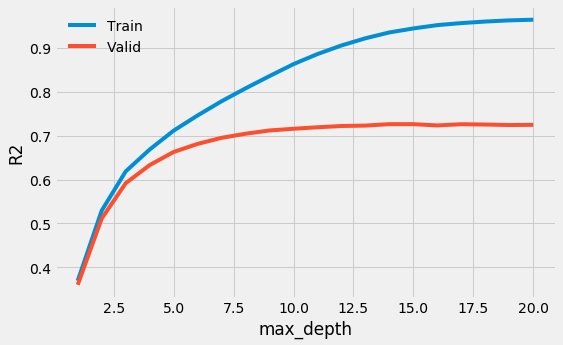

In [563]:
plt.plot(max_depth_arr, metric_train_arr, label="Train")
plt.plot(max_depth_arr, metric_valid_arr, label="Valid")
plt.legend(loc="best", frameon=False)
plt.xlabel('max_depth')
plt.ylabel('R2')

In [564]:
np.max(metric_valid_arr)

0.7259868752203161

In [565]:
metric_valid_arr.index(np.max(metric_valid_arr))+1

14

In [566]:
def evaluate_model2(model, train_df, valid_df, metric, max_features):
    rfr = model(max_depth=15, random_state=42, n_estimators=300, max_features=max_features, min_samples_leaf=1 )
    rfr.fit(train_df, train['Price'])
    y_pred_train = rfr.predict(train_df)
    y_pred_valid = rfr.predict(valid_df)
    metric_train = metric(train['Price'], y_pred_train)
    metric_valid = metric(valid['Price'], y_pred_valid)

    return metric_train, metric_valid

In [567]:
def check_param2(min_value, max_value, model, train_df, valid_df, metric=r2):
    max_features_arr = []
    metric_train_arr = []
    metric_valid_arr = []

    for i in range(min_value, max_value+1):
        res = evaluate_model2(model, train_df, valid_df, metric, max_features=i)
        max_features_arr.append(i)
        metric_train_arr.append(res[0])
        metric_valid_arr.append(res[1])
    return max_features_arr, metric_train_arr, metric_valid_arr

In [568]:
max_features_arr, metric_train_arr, metric_valid_arr = check_param2(min_value=1, max_value=len(feats_list), model = RFR, train_df=feats_train_scaled, valid_df=feats_valid_scaled)

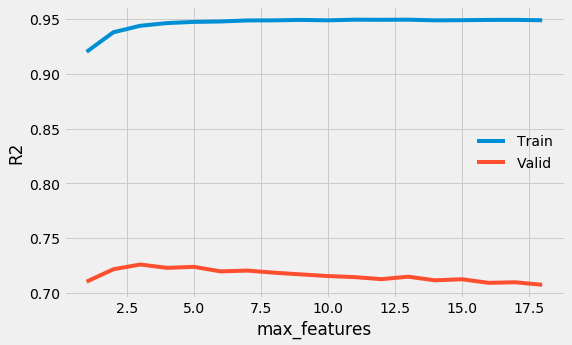

In [569]:
plt.plot(max_features_arr, metric_train_arr, label='Train')
plt.plot(max_features_arr, metric_valid_arr, label='Valid')
plt.legend(loc="best", frameon=False)
plt.xlabel('max_features')
plt.ylabel('R2')
plt.show()

In [570]:
np.max(metric_valid_arr)

0.7259657056545338

In [571]:
metric_valid_arr.index(np.max(metric_valid_arr))+1

3

In [612]:
model = RFR(max_depth=14, random_state=42, n_estimators=265, max_features=3, min_samples_leaf=1)

In [613]:
model.fit(feats_train_scaled,train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=265, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [614]:
y_train_pred=model.predict(feats_train_scaled)

In [615]:
y_valid_pred=model.predict(feats_valid_scaled)

In [616]:
r2(train['Price'], y_train_pred)

0.9348374623083912

In [617]:
r2(valid['Price'], y_valid_pred)

0.7264690050884796

## TEST

In [618]:
test=pd.read_csv('input/test.csv')

In [619]:
clean_rooms(test, Sq_room_ratio=Sq_room_ratio)

In [620]:
clean_Square(test,Square_min=Square_min, Square_max=Square_max, LifeSq_ratio=LifeSq_ratio, Sq_room_ratio=Sq_room_ratio)

In [621]:
fill_LifeSquare(test, LifeSq_ratio=LifeSq_ratio)

In [622]:
add_clean_rooms(test)

In [623]:
cleanKitchenSquare(test)

In [624]:
clean_HouseYear(test, mean_year)

In [625]:
clean_HouseFloor(test)
clean_Floor(test, mean_floor)

In [626]:
clean_Ecology(test)
clean_shops(test)

In [627]:
test=add_MeanPriceByDistrict(test)

In [628]:
test_feats=get_feats(test,feats_list=feats_list)

In [629]:
feats_test_scaled = scaler.fit_transform(test_feats)
feats_test_scaled = pd.DataFrame(feats_test_scaled, columns=test_feats.columns)

In [630]:
test['Price']=model.predict(feats_test_scaled)

In [631]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,MeanPrice,Price
0,725,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,1,1,11,2748,1,NaN,0,0,1,141220.898530,158309.249300
1,15856,74,2.0,69.263183,46.986829,1.0,1.0,1.0,1977,0.075779,1,1,6,1437,3,NaN,0,2,1,228872.788273,226841.509410
2,5480,190,1.0,13.597819,9.224502,12.0,2.0,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1,108833.610753,180803.823023
3,15664,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,1,1,23,4583,3,NaN,3,3,1,295396.711832,316856.189610
4,14275,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017,0.072158,1,1,2,629,1,NaN,0,0,0,129268.861061,141698.412222


In [632]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int64
Ecology_3        5000 non-null int64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null int64
MeanPrice        5000 non-null float64
Price            5000 non-null float64
dtypes: float64(10), int64(11)
memory usage: 859.4 KB


In [640]:
test.loc[:, ['Id', 'Price']].to_csv('RIrnazarova_predictions.csv', index=None)

In [641]:
test.to_csv('Test_ALL_predictions.csv', index=None)

In [642]:
train['Price2']=model.predict(feats_train_scaled)
train.groupby(['Rooms'])[['Square','Price', 'Price2']].mean()

,Square,Price,Price2
Rooms,,,
1.0,41.249392,160112.656260,160578.682626
2.0,56.598529,215158.205286,214830.273854
3.0,77.250062,291006.601434,290421.212273
4.0,98.651884,385776.526291,383103.216486
5.0,118.205928,417315.881296,414868.943468


In [643]:
valid['Price2']=model.predict(feats_valid_scaled)
valid.groupby(['Rooms'])[['Square','Price','Price2']].mean()

,Square,Price,Price2
Rooms,,,
1.0,41.243409,159116.560176,160849.113421
2.0,56.245254,214976.811711,215616.988771
3.0,76.726346,286708.649663,289778.086077
4.0,98.704706,378097.664880,370757.716349
5.0,138.608445,457807.744145,429519.452964
8.0,212.932361,302211.260887,348641.598647


In [644]:
valid['Rooms'].value_counts()

2.0    1160
1.0    1113
3.0     673
4.0      47
5.0       6
8.0       1
Name: Rooms, dtype: int64

In [645]:
test.groupby(['Rooms'])[['Square','Price']].mean()

,Square,Price
Rooms,,
1.0,41.030384,161612.472743
2.0,56.710740,215450.704578
3.0,77.238393,287079.292385
4.0,95.310586,372787.576742
5.0,124.392405,364266.745461
8.0,223.453689,459039.091219


In [639]:
test['Rooms'].value_counts()

2.0    2034
1.0    1769
3.0    1099
4.0      90
5.0       7
8.0       1
Name: Rooms, dtype: int64